# Visualizing Honey Production 🍯 🐝

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
honey = pd.read_csv('../honey.csv')
honey[-5:]

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


Use a scatterplot to show the relationship between a state and its price per pound for local honey

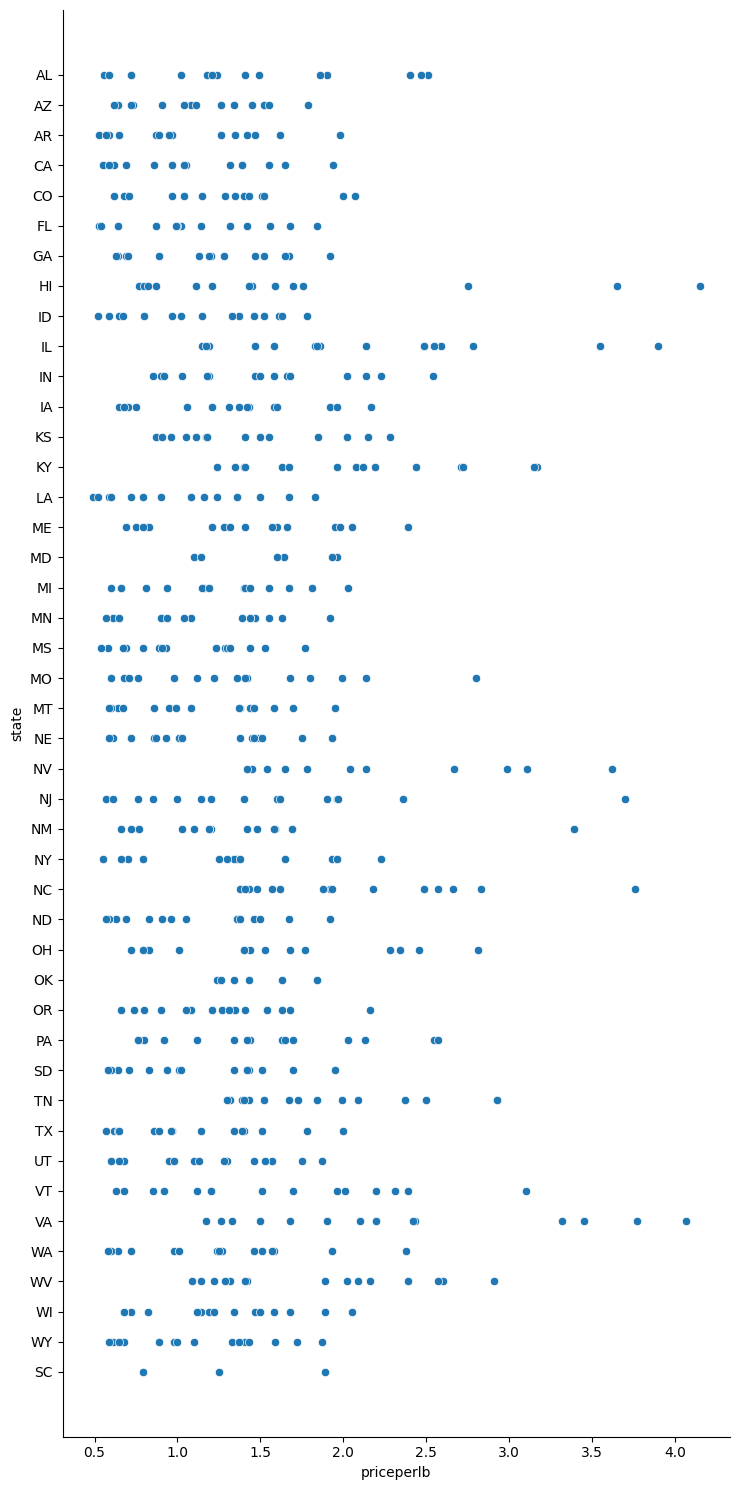

In [7]:
sns.relplot(x="priceperlb", y="state", data=honey, height=15, aspect=.5);

Show this relationship plus a new yellow-colored scatterplot with hue determined by year.

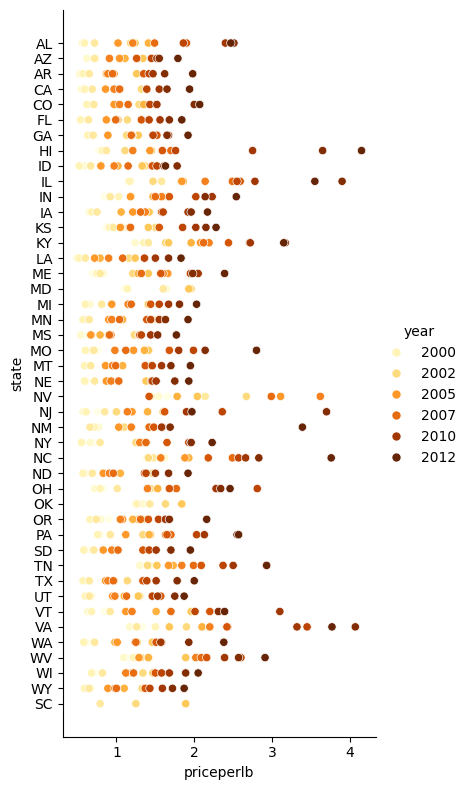

In [8]:
sns.relplot(x="priceperlb", y="state", hue="year", palette="YlOrBr", data=honey, height=8, aspect=.5);


show with another color

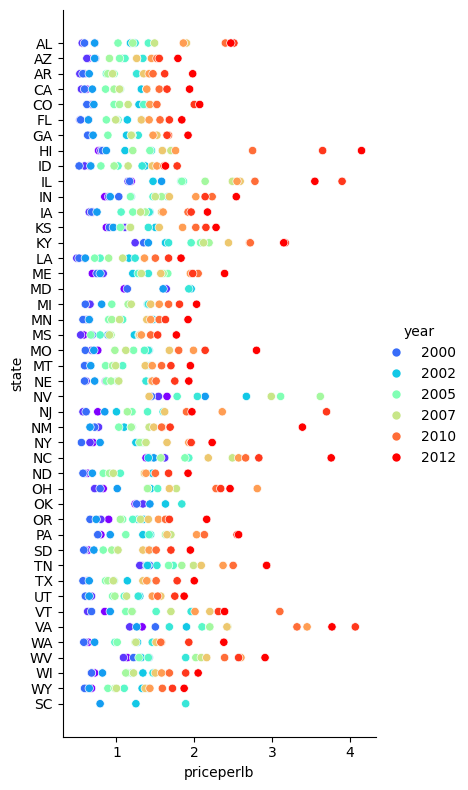

In [9]:
sns.relplot(x="priceperlb", y="state", hue="year", palette="rainbow", data=honey, height=8, aspect=.5);

With this color scheme change, you can see that there's obviously a strong progression over the years in terms of honey price per pound. Indeed, if you look at a sample set in the data to verify (pick a given state, Arizona for example) you can see a pattern of price increases year over year, with few exceptions:

In [5]:
honey[honey['state']== 'AZ']

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
44,AZ,52000.0,62,3224000.0,1548000.0,0.62,1999000.0,1999
87,AZ,40000.0,59,2360000.0,1322000.0,0.73,1723000.0,2000
130,AZ,43000.0,59,2537000.0,1142000.0,0.72,1827000.0,2001
174,AZ,38000.0,63,2394000.0,1197000.0,1.08,2586000.0,2002
218,AZ,35000.0,72,2520000.0,983000.0,1.34,3377000.0,2003
262,AZ,32000.0,55,1760000.0,774000.0,1.11,1954000.0,2004
303,AZ,36000.0,50,1800000.0,720000.0,1.04,1872000.0,2005
344,AZ,30000.0,65,1950000.0,839000.0,0.91,1775000.0,2006
385,AZ,30000.0,64,1920000.0,902000.0,1.26,2419000.0,2007


Try this plot one more time, this time showing the price change by size of the dot in the scatterplot

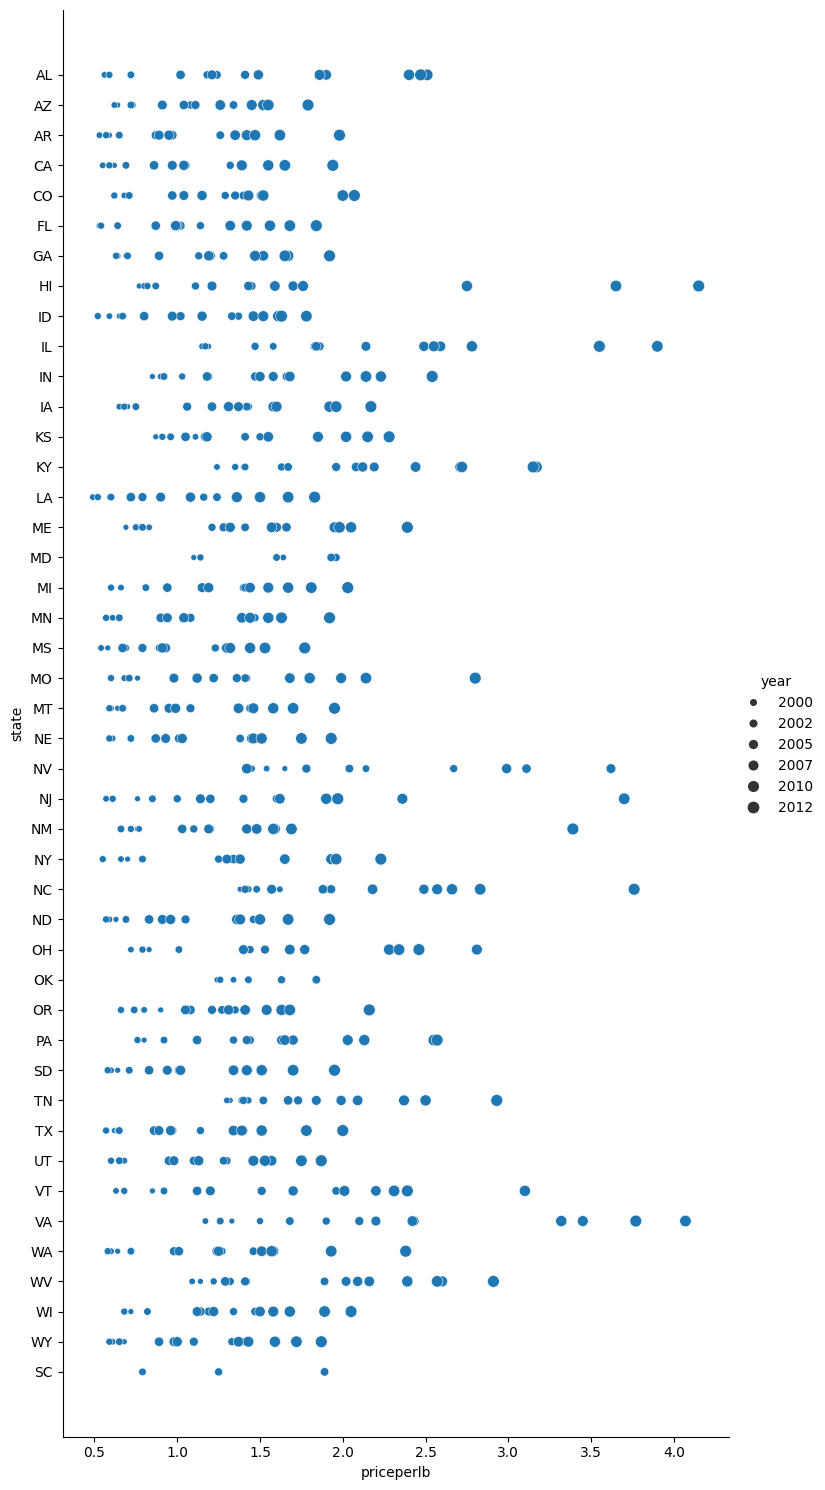

In [6]:
sns.relplot(x="priceperlb", y="state", size="year", data=honey, height=15, aspect=.5);

Show with different style

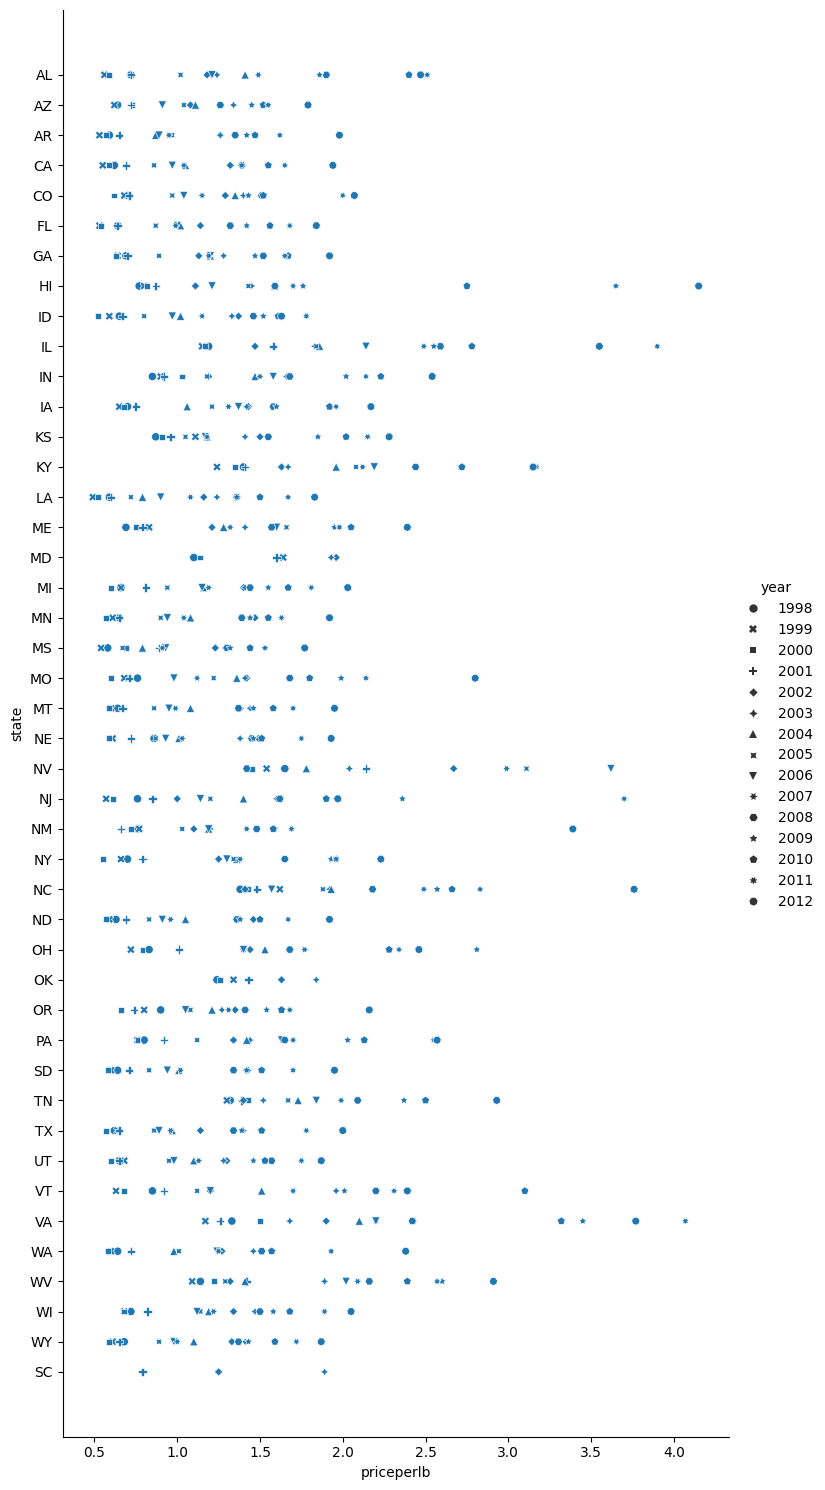

In [25]:
sns.relplot(x="priceperlb", y="state", style="year", data=honey, height=15, aspect=.5);

Is this a simple case of supply and demand? Due to factors such as climate change and colony collapse, is there less honey available for purchase year over year, and thus the price increases?

To discover a correlation between some of the variables in this dataset, let's explore some line charts.

Explore some line charting options

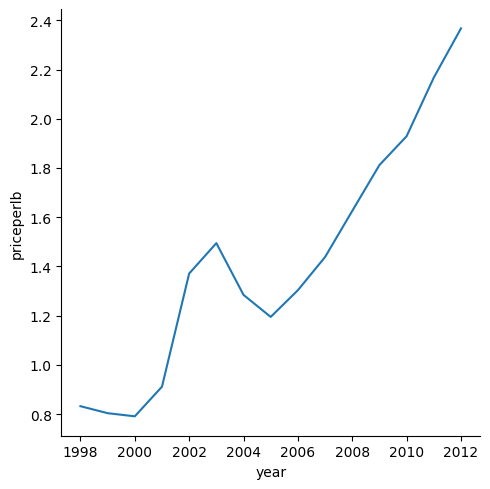

In [10]:
sns.relplot(x="year", y="priceperlb", kind="line", data=honey, errorbar= None)

Add confidence interval (95 %)

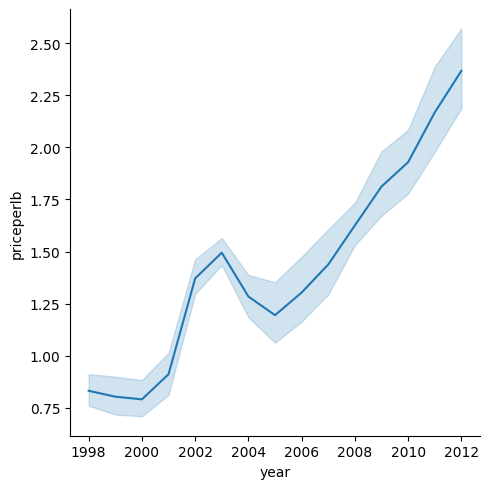

In [11]:
sns.relplot(x="year", y="priceperlb", kind="line", data=honey)

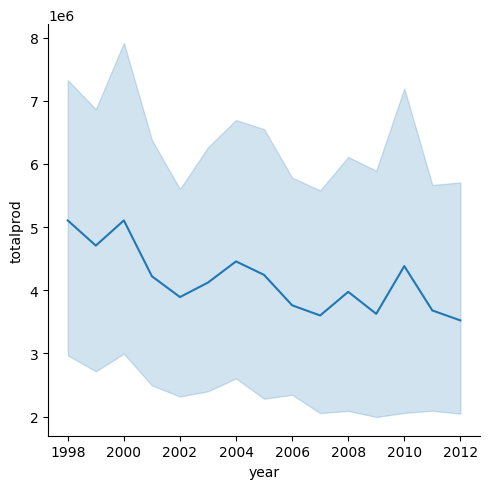

In [12]:
sns.relplot(x="year", y="totalprod", kind="line", data=honey)

Build a facet grid

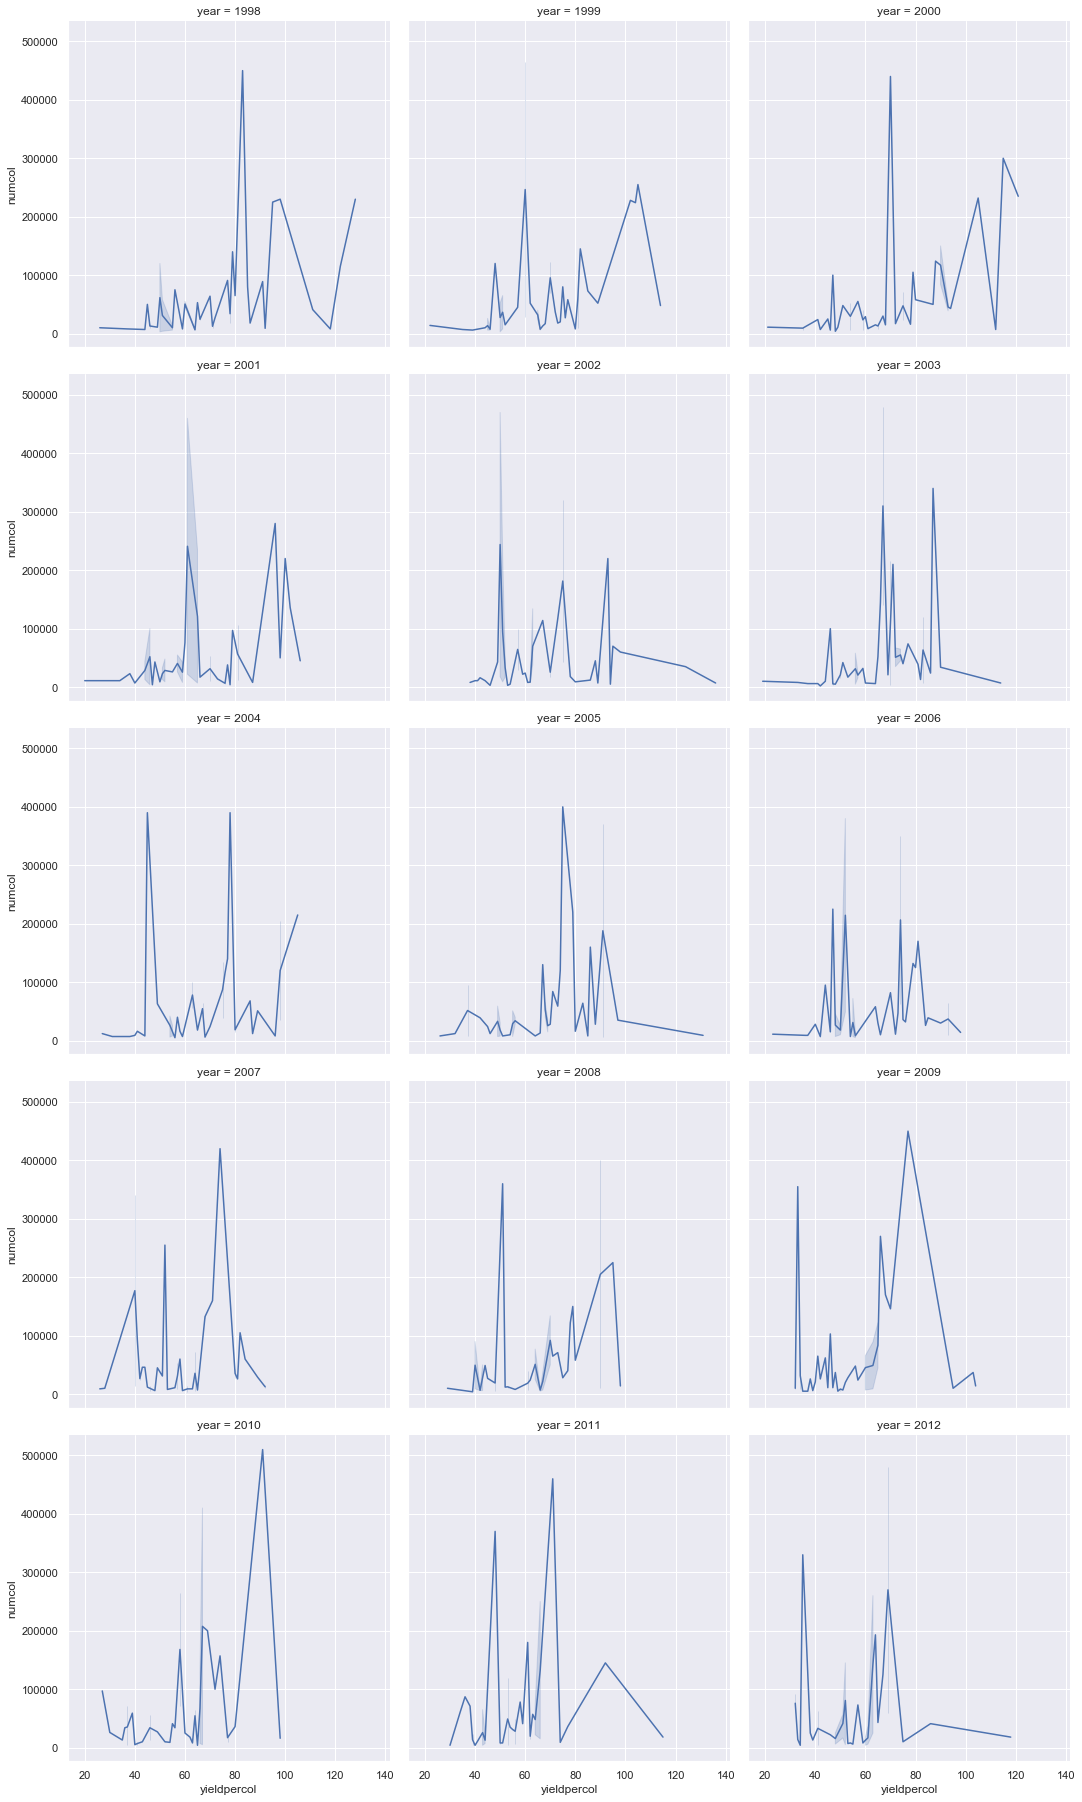

In [189]:

sns.relplot(
    data=honey, 
    x="yieldpercol", y="numcol",
    col="year", 
    col_wrap=3,
    kind="line"
)


Create a dual line plot (this solution is suggested by Kedar Ghule: https://kedar.hashnode.dev/how-to-combine-two-line-charts-in-seaborn-and-python)

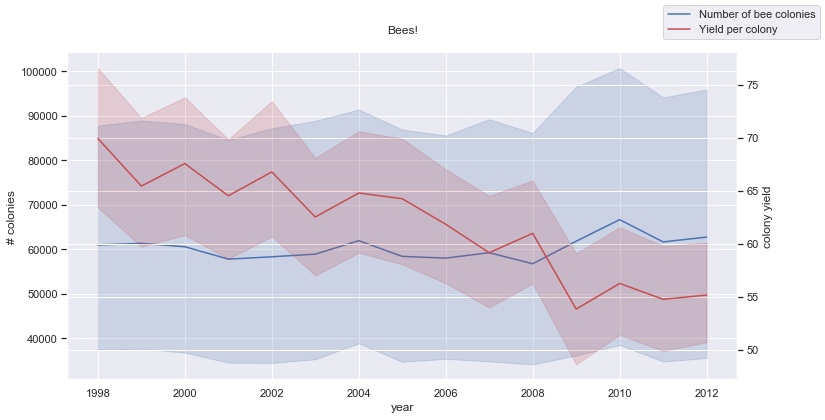

In [200]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(x=honey['year'], y=honey['numcol'], data=honey, 
                        label = 'Number of bee colonies', legend=False)
sns.despine()
plt.ylabel('# colonies')
plt.title('Honey Production Year over Year');

ax2 = ax.twinx()
lineplot2 = sns.lineplot(x=honey['year'], y=honey['yieldpercol'], ax=ax2, color="r", 
                         label ='Yield per colony', legend=False) 
sns.despine(right=False)
plt.ylabel('colony yield')
ax.figure.legend()

## Assignment

In this lesson you started looking at a dataset around bees and their honey production over a period of time that saw losses in the bee colony population overall. Dig deeper into this dataset and build a notebook that can tell the story of the health of the bee population, state by state and year by year. Do you discover anything interesting about this dataset?

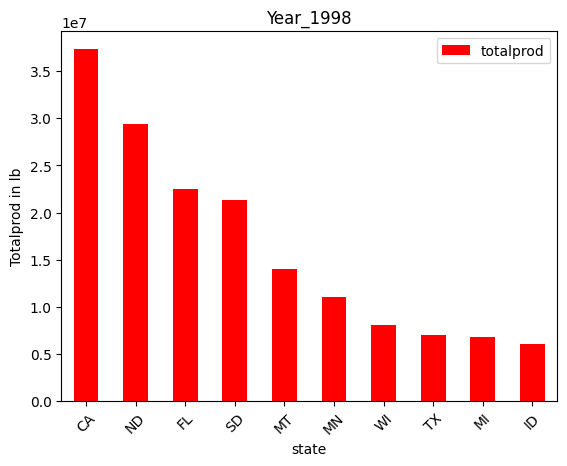

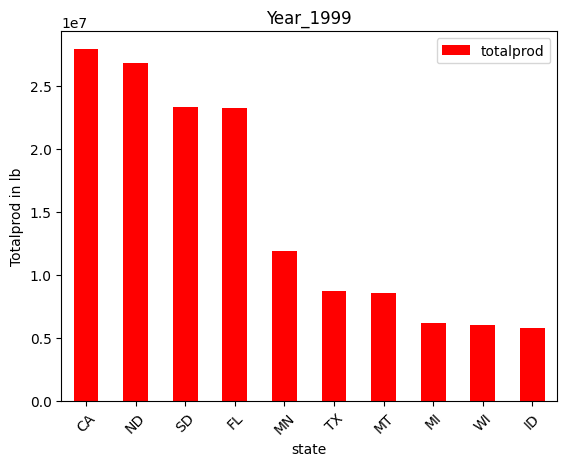

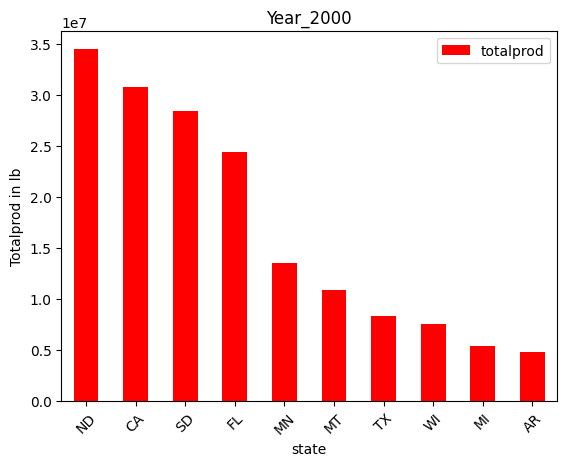

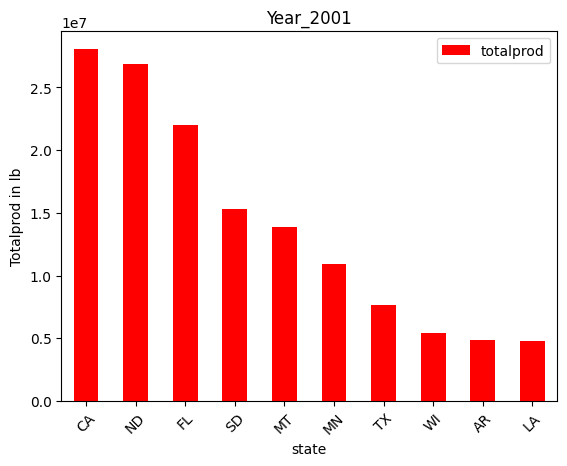

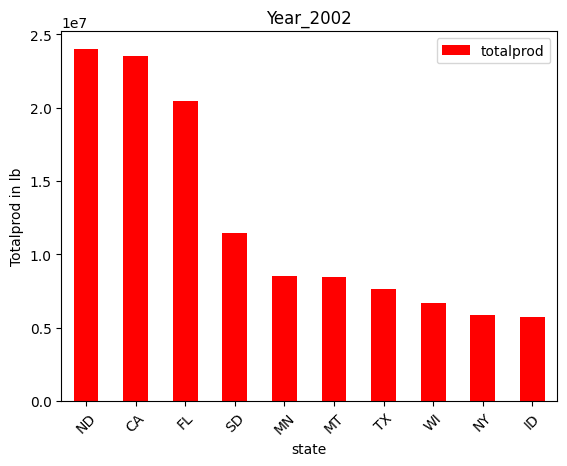

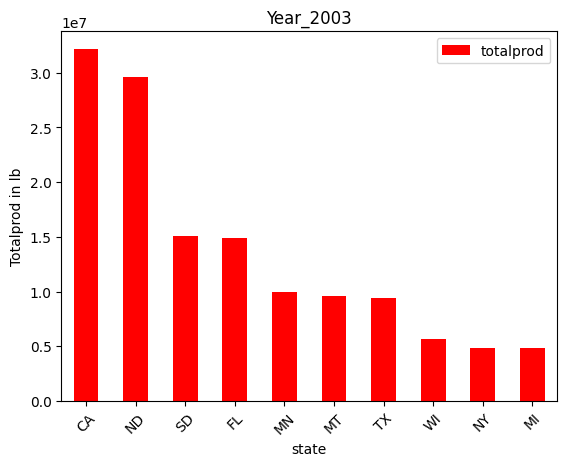

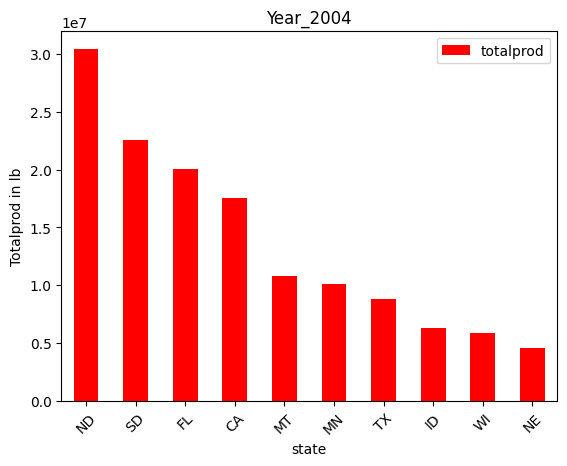

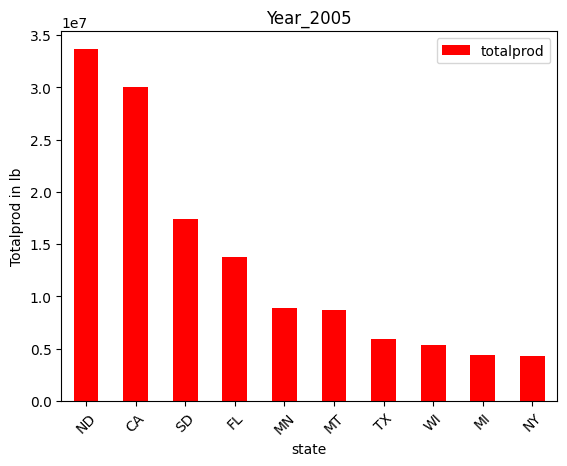

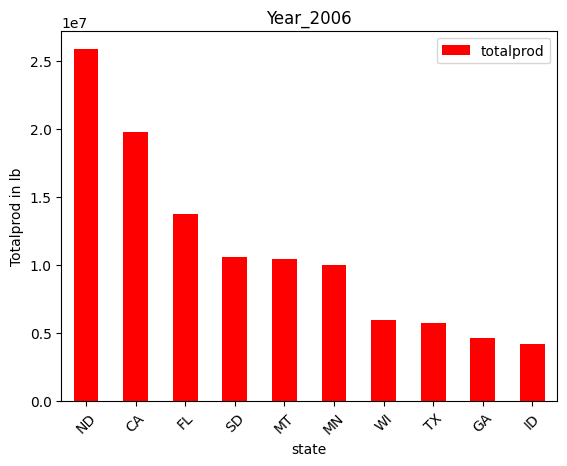

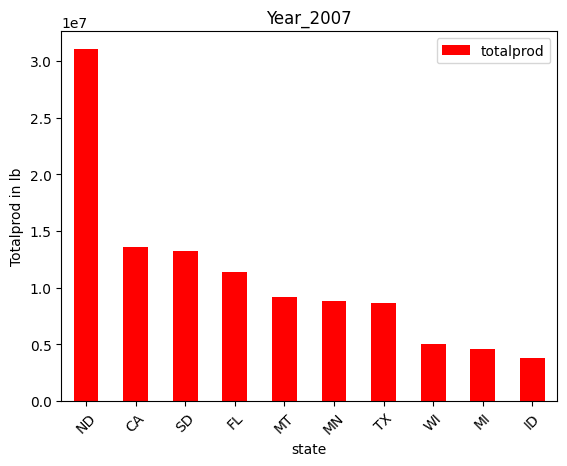

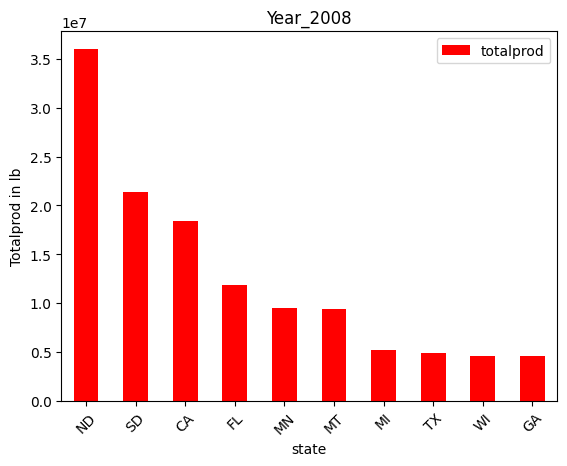

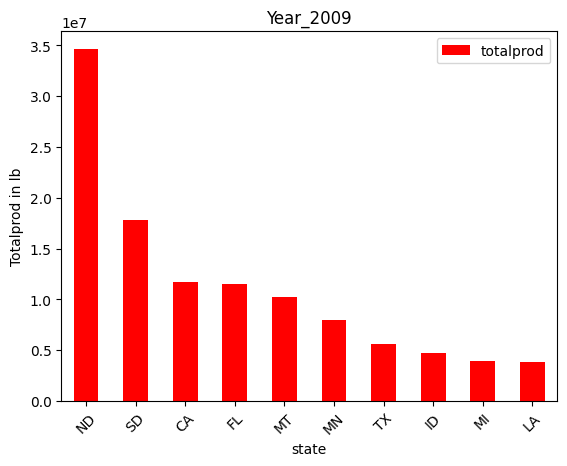

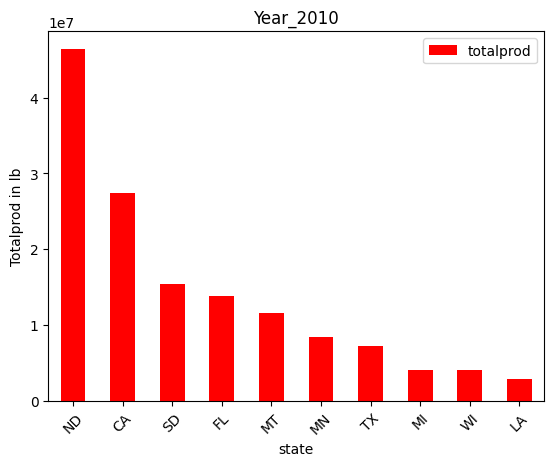

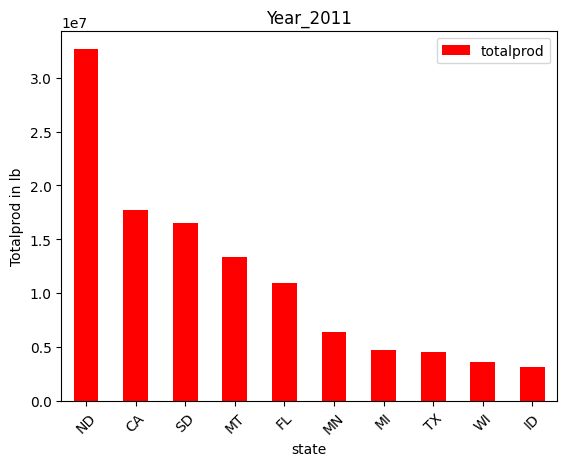

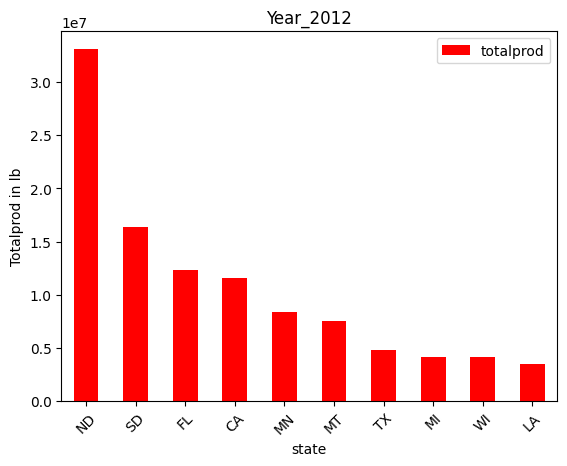

In [25]:

for year in range(1998, 2013):
    year_prod = honey[['state', 'totalprod']].loc[honey.year == year]
    year_prod = year_prod.set_index('state')
    y_1998 = year_prod.sort_values(by='totalprod', ascending=False)[:10].plot(kind='bar',color='red', title=f'Year_{year}', ylabel='Totalprod in lb')
    plt.xticks(rotation = 45)
    plt.show()

North Dakota has heighest production in all years
In the year 1998, California was the heighest production city but from 1999 North Dakota is the highest honey producing state

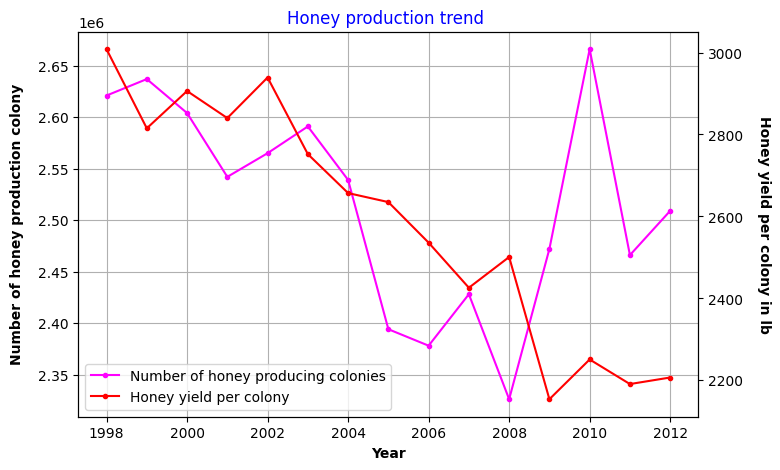

In [28]:
fig, ax1 = plt.subplots(figsize=[8,5])
 
ln1 = ax1.plot(honey.groupby(by='year')['numcol'].sum(), color='magenta',marker='.', label='Number of honey producing colonies')
ax1.xaxis.grid()
ax1.yaxis.grid()

ax2 = ax1.twinx()
ln2 = ax2.plot(honey.groupby(by='year')['yieldpercol'].sum(), color='red', marker='.', label='Honey yield per colony')

# getting all the labels
lines = ln1+ln2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)

plt.title("Honey production trend ", color='blue')
ax1.set_xlabel("Year", weight='bold')
ax1.set_ylabel("Number of honey production colony",labelpad= 10,weight='bold')
ax2.set_ylabel("Honey yield per colony in lb",rotation=-90, labelpad=20, weight='bold')

plt.show()

Nhận thấy rằng trước năm 2008 số lượng đàn ong và sản lượng mỗi đàn xó xu hướng giảm
Đến năm 2010 thì số lượng  đàn ong tăng mạnh sau  đó lại giảm 

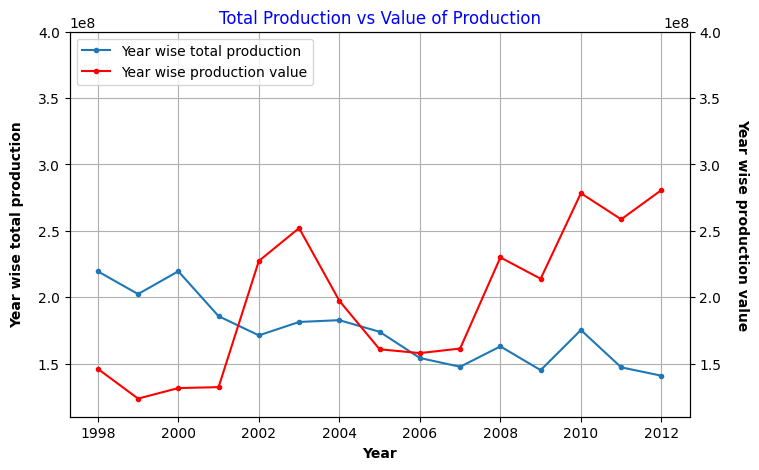

In [32]:

year_wise_totalprod = honey.groupby(by='year')['totalprod'].sum()
year_wise_prodvalue = honey.groupby(by ='year')['prodvalue'].sum()

fig, ax3 = plt.subplots(figsize=[8,5])

ln1 = ax3.plot(year_wise_totalprod.index, year_wise_totalprod.values,marker='.', label ="Year wise total production")
ax3.set_ylim((1.1*pow(10,8)), (4*pow(10,8)))

ax4 = ax3.twinx()

ln2 = ax4.plot(year_wise_prodvalue.index, year_wise_prodvalue.values , color='red',marker='.', label= "Year wise production value")
ax4.set_ylim((1.1*pow(10,8)), (4*pow(10,8)))

ax3.xaxis.grid()
ax3.yaxis.grid()

lines = ln1 + ln2
labels = [l.get_label() for l in lines]
ax3.legend(lines, labels, loc='upper left')


plt.title("Total Production vs Value of Production", color='blue')
ax3.set_xlabel("Year", weight='bold')
ax3.set_ylabel("Year wise total production",labelpad= 10,weight='bold')
ax4.set_ylabel("Year wise production value",rotation=-90, labelpad=20, weight='bold')
plt.show()

Nhận thấy rằng nhìn chug tổng sản lượng có xu hướng giảm và tổng giá trị sản xuất có xu hướng tăng chứng tỏ giá trị trên mỗi pound sẽ có sự tăng qua các năm ta cùng xem điều đó có đúng không

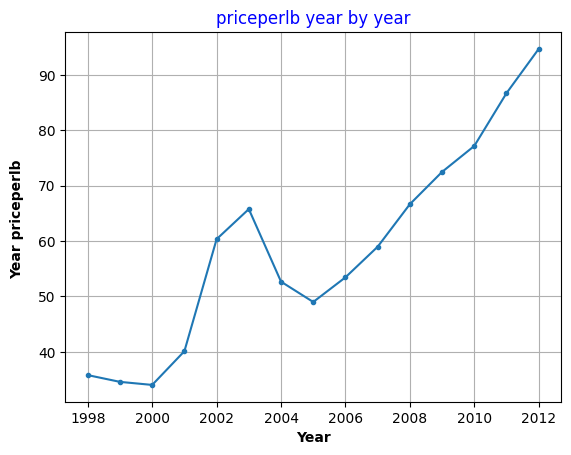

In [35]:
year_wise_totalprod = honey.groupby(by='year')['priceperlb'].sum()
plt.title("priceperlb year by year", color='blue')
plt.plot(year_wise_totalprod.index, year_wise_totalprod.values,marker='.', label ="")
plt.xlabel("Year", weight='bold')
plt.ylabel("Year priceperlb ",labelpad= 10,weight='bold')
plt.grid()
plt.show()

Nhận thấy rằng rõ ràng rằng giá trị trên từng pound có sự tăng qua các năm chứng tỏ một điều rằng nhu cầu mật ong tăng qua các năm trong khi đó sản lượng mật ong không có sự cải thiện đáng kể do đó giá mật ong sẽ tăng lên qua từng năm --> tổng giá trị mật ong cũng tăng qua từng năm

Hiển thị số  lượng hàng trong kho của từng bang

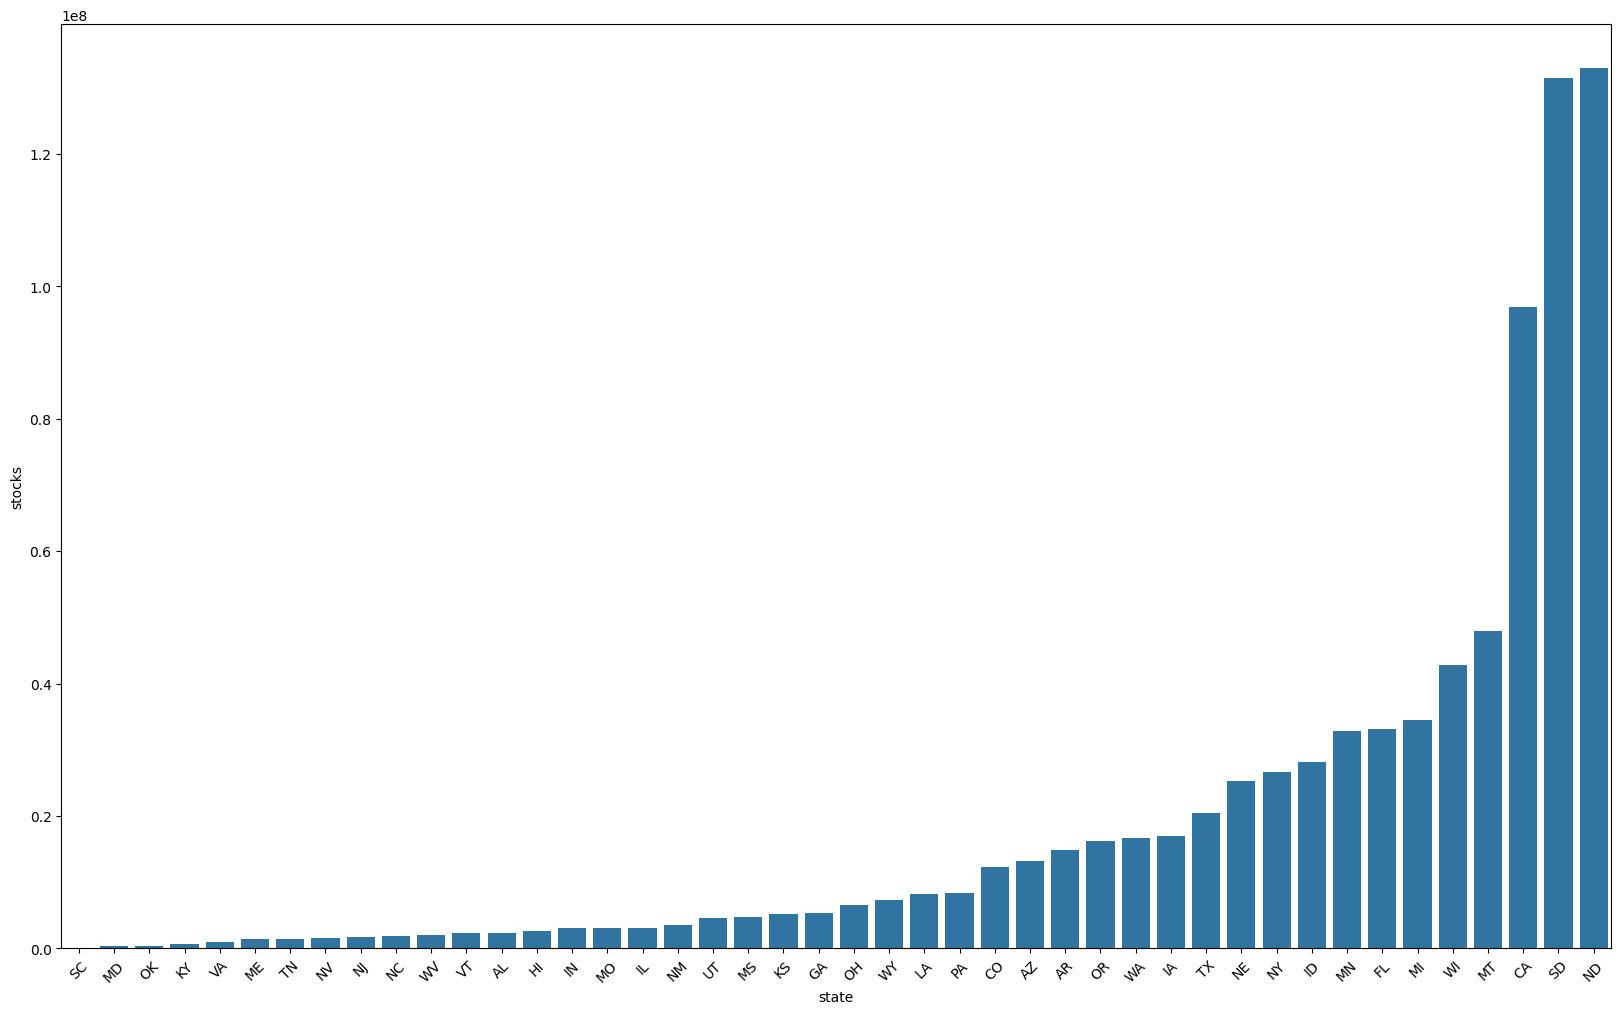

In [40]:
v0 = honey.groupby('state').sum()
v0 = v0.reset_index()
v0 = v0.drop('year',axis = 1)
v0.head()

plt.subplots(figsize = (20,12))
sns.barplot(v0,x ='state', y = 'stocks',order = v0.sort_values('stocks').state)
plt.xticks(rotation = 45)
plt.show()

Nhận thấy rằng ở những bang có sản lượng cao thì stock cũng cao ta cùng đi kiểm chứng điều này

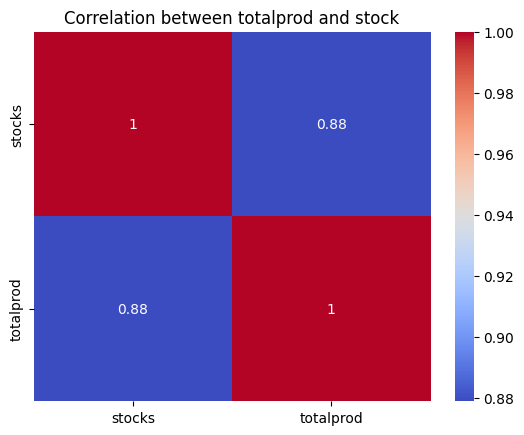

In [52]:
sns.heatmap(honey[['stocks', 'totalprod']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between totalprod and stock')
plt.show()